# <center><font color='green' face='comic sans ms'> fraudulent transaction prediction </font></center> 

<font color = 'brawn'> Name: </font> Toukap Fotso Jucelin Armand

<font color = 'brawn'> Mail: </font> armandtoukap4@gmail.com

<font color = 'brawn'> Batch: </font>DST 20823

<font color = 'brawn'> Starting date: </font> September 2023

<b>Problem on Hand: </b> Given a data set,develop a model for predicting fraudulent transactions for a financial company and use insights from the model to develop an actionable plan.</b>

# Outline
1. Import Datasets
2. Exploratory Data Analysis 
3. Data Cleaning and Data Preparation
4. Feature Engineering
5. Train Test Split
6. Model Building
7. Model Evaluation

In [2]:
# Import Libraries for Analysis
import numpy as np
import pandas as pd

# Import Libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# library from preprocessing Module.
from sklearn.preprocessing import LabelEncoder

# Import libraries for train test split
from sklearn.model_selection import train_test_split

# import Ilbrary for Scaling
from sklearn.preprocessing import StandardScaler

# import Ilbrary for Model Building
from sklearn.ensemble import IsolationForest
from sklearn.tree import DecisionTreeRegressor


# Supress Warnings
import warnings
warnings.filterwarnings('ignore')


## <font color='indigo' face='Cursive'> Importing the data set </font>

<b> The data set is in csv format and can be imported using [read_csv](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) method available in pandas library.we can access the data using the following [link](https://drive.google.com/uc?export=download&confirm=6gh6&id=1VNpyNkGxHdskfdTNRSjjyNa5qC9u0JyV) on google drive.
    <br><br> </b>

Also we will be checking whether the data set is correctly imported by checking the top 10 rows of data set

In [3]:
# Read the csv file and displayed it as well
data = pd.read_csv('Fraud.csv')
data.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


In [4]:
# print the columns of our dataset
data.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

<font color = 'Blue'> Data dictionnary: </font>


- step : maps a unit of time in the real world. In this case 1 step is 1 hour of time. Total steps 744 (30 days simulation).

- type : CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER.

- amount : amount of the transaction in local currency.

- nameOrig : customer who started the transaction

- oldbalanceOrg : initial balance before the transaction

- newbalanceOrig : new balance after the transaction

- nameDest : customer who is the recipient of the transaction

- oldbalanceDest : initial balance recipient before the transaction.Note that there is not information for customers that start with M (Merchants).

- newbalanceDest : new balance recipient after the transaction. Note that there is not information for customers that start with M (Merchants).

- isFraud : This is the transactions made by the fraudulent agents inside the simulation. 
In this specific dataset the fraudulent behavior of the agents aims to profit by taking control or 
customers accounts and try to empty the funds by transferring to another account and then cashing out of the system.

- isFlaggedFraud : The business model aims to control massive transfers from one account to another and flags illegal attempts.
 An illegal attempt in this dataset is an attempt to transfer more than 200.000 in a single transaction.

## <font color='indigo' face='Cursive'> data cleaning and data preparation </font>

In [5]:
data.shape

(6362620, 11)

<font color = 'Blue'> result: </font>
our data set contains 11 columns and 6362620 rows

In [6]:
# let print information about our data set
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


<font color = 'Blue'> result: </font>
All the data has numerical datatypes except type,nameOrig and nameDest which has object datatypes

In [7]:
# missing values
data.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

<font color = 'Blue'> result: </font>
  As we can see the dataset is clean as there is no null values in the dataset

In [8]:
# We can see the statistical summary of the data
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


<font color = 'Blue'> result: </font>
    we observe respectively the count number of observations, the maximum values,
    minimum values,the mean, the standard deviation and each quartile of all numerical columns of our data


In [9]:
# outliers detections
data_outlier_remove=data.copy()

In [10]:
outlier_list=["step","amount","oldbalanceOrg","newbalanceOrig","oldbalanceDest"]


for i in data_outlier_remove.loc[:,outlier_list]:
    Q1 = data_outlier_remove[i].quantile(0.10)
    Q3 = data_outlier_remove[i].quantile(0.90)
    IQR = Q3-Q1
    up = Q3 + 1.5*IQR
    low = Q1 - 1.5*IQR

    if data_outlier_remove[(data_outlier_remove[i] > up) | (data_outlier_remove[i] < low)].any(axis=None):
        print(i,"-> Yes! There are Outliers.")
    else:
        print(i, "-> No Outliers")

step -> No Outliers
amount -> Yes! There are Outliers.
oldbalanceOrg -> Yes! There are Outliers.
newbalanceOrig -> Yes! There are Outliers.
oldbalanceDest -> Yes! There are Outliers.


<AxesSubplot:>

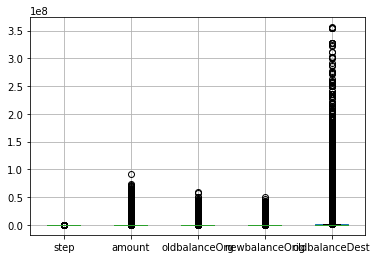

In [11]:
# let visualize the outliers
data.boxplot(outlier_list)

In [12]:
# treat our outliers 
data.loc[data[i] < low,i] = np.nan
data.loc[data[i] > up,i] = np.nan

In [13]:
data.isnull().sum()

step                   0
type                   0
amount                 0
nameOrig               0
oldbalanceOrg          0
newbalanceOrig         0
nameDest               0
oldbalanceDest    190682
newbalanceDest         0
isFraud                0
isFlaggedFraud         0
dtype: int64

In [14]:
missing_col = ['oldbalanceDest']
#Technique 1: Using mean to impute the missing values
for i in missing_col:
    data.loc[data.loc[:,i].isnull(),i]=data.loc[:,i].mean()

In [15]:
data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

## <font color='indigo' face='Cursive'>Exploratory Data Analysis</font>

In [16]:
# let check distinct observation over our data set
data.nunique()

step                  743
type                    5
amount            5316900
nameOrig          6353307
oldbalanceOrg     1845844
newbalanceOrig    2682586
nameDest          2722362
oldbalanceDest    3424994
newbalanceDest    3555499
isFraud                 2
isFlaggedFraud          2
dtype: int64

<font color = 'Blue'> result: </font>
our data containt 743 step which carry out 5 distincts type of transaction    
    

col_0     count of transaction type
type                               
CASH_IN                     1399284
CASH_OUT                    2237500
DEBIT                         41432
PAYMENT                     2151495
TRANSFER                     532909


<AxesSubplot:xlabel='type'>

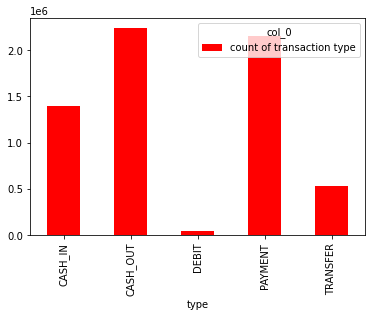

In [17]:
# let check distribution of type
data.type.value_counts()
typ=pd.crosstab(index=data.type, columns = 'count of transaction type')
print(typ)
typ.plot(kind='bar',color='r')

<font color = 'Blue'> result: </font>
CASH_OUT and PAYMENT have the most transaction type made while DEBIT comes with the least transaction made

0    6354407
1       8213
Name: isFraud, dtype: int64


<AxesSubplot:ylabel='isFraud'>

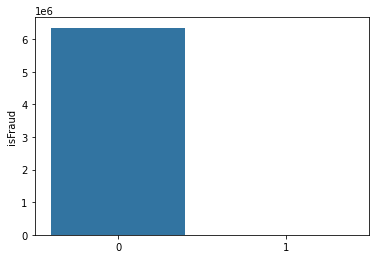

In [18]:
# let check the distribution of the Isfraud columns
d=data.isFraud.value_counts()
print(d)
sns.barplot(data.isFraud.unique(),data.isFraud.value_counts())


<b>let use Label Encoding to encode our categorical column</b>

In [19]:
# Importing LabelEncoder from Sklearn
# library from preprocessing Module.
from sklearn.preprocessing import LabelEncoder
 
# Creating a instance of label Encoder.
le = LabelEncoder()
 
# Using .fit_transform function to fit label
# encoder and return encoded label
type_1 = le.fit_transform(data['type'])


In [20]:
# removing the column 'type' from df
# as it is of no use now.
data.drop("type", axis=1, inplace=True)
 
# Appending the array to our dataFrame
# with column name 'type'
data["type"] = type_1
 
# printing Dataframe
data.head()

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type
0,1,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,3
1,1,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,3
2,1,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,4
3,1,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,1
4,1,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,3


In [21]:
nameOrig_1 = le.fit_transform(data['nameOrig'])

data.drop("nameOrig", axis=1, inplace=True)
 
data["nameOrig"] = nameOrig_1

In [22]:
nameDest_1 = le.fit_transform(data['nameDest'])

data.drop("nameDest", axis=1, inplace=True)
 
data["nameDest"] = nameDest_1

In [23]:
data.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type,nameOrig,nameDest
0,1,9839.64,170136.0,160296.36,0.0,0.0,0,0,3,757869,1662094
1,1,1864.28,21249.0,19384.72,0.0,0.0,0,0,3,2188998,1733924
2,1,181.00,181.0,0.00,0.0,0.0,1,0,4,1002156,439685
3,1,181.00,181.0,0.00,21182.0,0.0,1,0,1,5828262,391696
4,1,11668.14,41554.0,29885.86,0.0,0.0,0,0,3,3445981,828919


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   amount          float64
 2   oldbalanceOrg   float64
 3   newbalanceOrig  float64
 4   oldbalanceDest  float64
 5   newbalanceDest  float64
 6   isFraud         int64  
 7   isFlaggedFraud  int64  
 8   type            int32  
 9   nameOrig        int32  
 10  nameDest        int32  
dtypes: float64(5), int32(3), int64(3)
memory usage: 461.2 MB


<font color = 'Blue'> result: </font>
    all columns of our dataset are all numerical type

## <font color='indigo' face='Cursive'>Feature selection</font>

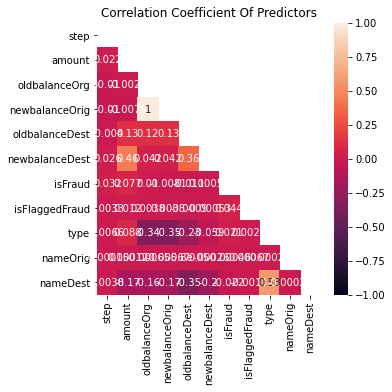

In [54]:
# set figure size
plt.figure(figsize=(5,5))

# Generate a mask to onlyshow the bottom triangle
mask = np.triu(np.ones_like(data.corr(), dtype=bool))

# generate heatmap
sns.heatmap(data.corr(), annot=True, mask=mask, vmin=-1, vmax=1)
plt.title('Correlation Coefficient Of Predictors')
plt.show()

<font color = 'Blue'> result: </font>
- the oldbalanceOrg and newbalanceOrg are highly related
- Name dest and type are related 
- key factors that predict fraudulent customer are isFraud and amount

In [26]:
# displays the correlated data 
corr_matrix = data.corr()
corr_matrix["isFlaggedFraud"].sort_values(ascending=False)

isFlaggedFraud    1.000000
isFraud           0.044109
amount            0.012295
oldbalanceOrg     0.003835
newbalanceOrig    0.003776
step              0.003277
type              0.002685
nameOrig          0.000667
newbalanceDest   -0.000529
oldbalanceDest   -0.000896
nameDest         -0.001122
Name: isFlaggedFraud, dtype: float64

<font color = 'Blue'> result: </font>
the keys factors that predict frodulent customers are isFraud and amount


## <font color='indigo' face='Cursive'>Creating our dependent and independent feature</font>

In [27]:
# Making our Independent Features
x = data[["step","amount","type","oldbalanceOrg","nameOrig","newbalanceOrig",'newbalanceDest',"nameDest","oldbalanceDest",'isFraud']]

# Making our Dependent Variable

y= data['isFlaggedFraud']

In [28]:
x.shape
x.head() ## Independent Variable

,step,amount,type,oldbalanceOrg,nameOrig,newbalanceOrig,newbalanceDest,nameDest,oldbalanceDest,isFraud
0,1,9839.64,3,170136.0,757869,160296.36,0.0,1662094,0.0,0
1,1,1864.28,3,21249.0,2188998,19384.72,0.0,1733924,0.0,0
2,1,181.00,4,181.0,1002156,0.00,0.0,439685,0.0,1
3,1,181.00,1,181.0,5828262,0.00,0.0,391696,21182.0,1
4,1,11668.14,3,41554.0,3445981,29885.86,0.0,828919,0.0,0


In [29]:
y.shape
y.head() ## Dependent Variable

0    0
1    0
2    0
3    0
4    0
Name: isFlaggedFraud, dtype: int64

## <font color='indigo' face='Cursive'>Splitting the data</font>

In [30]:
#Spliting the data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

In [31]:
print(x_train.shape)
print(x_test.shape)

(4453834, 10)
(1908786, 10)


In [32]:
print(y_train.shape)
print(y_test.shape)

(4453834,)
(1908786,)


## <font color='indigo' face='Cursive'>Model buildimg</font>
### <font color='red' face='Cursive'>Isolation forest algorithm </font>
Isolation Forest is a technique to detect anomalies .
The isolation forest  algorithm is based on the principle  fact that anomalies are data points that may be  few and different.
Therefore it  is an anomaly susceptible  mechanism. It introduces a more effective and efficient method to detect anomalies
which uses distance and density measurement.

In [33]:
#Importing Libraries for Outlier Detection
from sklearn.ensemble import IsolationForest

In [34]:
iso_forest= IsolationForest(n_estimators=100, max_samples=len(x_train),random_state=0, verbose=0)   
iso_forest.fit(x_train,y_train)

IsolationForest(max_samples=4453834, random_state=0)

In [35]:
ypred= iso_forest.predict(x_test)
ypred

array([1, 1, 1, ..., 1, 1, 1])

In [36]:
#Mapping the values as we want to have an output in 0 and 1
ypred[ypred == 1] = 0
ypred[ypred == -1] = 1

In [37]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
#accuracy and matrix
print(accuracy_score(y_test,ypred))

0.9886482822065963


In [38]:
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99   1908779
           1       0.00      1.00      0.00         7

    accuracy                           0.99   1908786
   macro avg       0.50      0.99      0.50   1908786
weighted avg       1.00      0.99      0.99   1908786



In [39]:
confusion_matrix(y_test, ypred)

array([[1887111,   21668],
       [      0,       7]], dtype=int64)

In [40]:
n_errors = (ypred != y_test).sum()
print("Isolation Forest have {} errors.".format(n_errors))

Isolation Forest have 21668 errors.


### <font color='red' face='Cursive'>Decision tree </font>

In [41]:
from sklearn.tree import DecisionTreeRegressor
dtree=DecisionTreeRegressor(max_depth=25)
dtree.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=25)

In [42]:
dtree.score(x_train, y_train)

1.0

In [43]:
dtree.score(x_test, y_test)

0.7142846664954787

In [44]:
p_test = dtree.predict(x_test)

In [45]:
def mae(p, t):
    return np.sum(np.abs(p - t)) / len(p)

mae(p_test, y_test)

1.0477863940745583e-06

In [46]:
def print_score(mm):
    print("train r^2 " + str(mm.score(x_train, y_train)))
    print("validation r^2 " + str(mm.score(x_test, y_test)))
    p_test = mm.predict(x_test)
    p_train = mm.predict(x_train)
    print("mean absolute error(Train): " + str(mae(p_train, y_train)))
    print("mean absolute error(Validation): " + str(mae(p_test, y_test)))
print_score(dtree)

train r^2 1.0
validation r^2 0.7142846664954787
mean absolute error(Train): 0.0
mean absolute error(Validation): 1.0477863940745583e-06


In [47]:
p_test = dtree.predict(x_test)

In [48]:
p_test

array([0., 0., 0., ..., 0., 0., 0.])